<div style="display: flex; justify-content: center; align-items: center; height: 150px; background-color: #f3f4f6; border: 2px solid #4CAF50; border-radius: 10px; padding: 10px; text-align: center; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.1);">
    <div style="text-align: center;">
        <h1 style="color: #4CAF50; margin: 10px; font-size: 2.5em;">Assignment | Deep Learning</h1>
    </div>
    <div style="text-align: left; margin-left: 20px;">
        <h3 style="color: #333; margin: 10px 0 0;">Name: Subhraneil Das</h3>
        <h3 style="color: #333; margin: 5px 0 0;">PRN: 23070243053</h3>
    </div>
</div>

## Drug Classification

Objective:
The goal is to classify patients into one of several drug categories (DrugY, drugA, drugB, drugC, drugX) based on their demographic and health attributes. 

Dataset Link: https://www.kaggle.com/datasets/prathamtripathi/drug-classification

Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

Reading the data

In [2]:
data = pd.read_csv(r"C:\Users\admin\Downloads\drug200.csv")

data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
data.shape

(200, 6)

In [4]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

Checking for null values

In [5]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Encoding the features

In [6]:
# Encoding categorical features
label_encoders = {}
for col in ['Sex', 'BP', 'Cholesterol']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Encoding the target variable
le_drug = LabelEncoder()
data['Drug'] = le_drug.fit_transform(data['Drug'])

# Features and target
X = data.drop(columns='Drug')
y = data['Drug']

# Scaling continuous features
scaler = StandardScaler()
X[['Age', 'Na_to_K']] = scaler.fit_transform(X[['Age', 'Na_to_K']])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

One-Hot Encoding

In [7]:
# Convert target to categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Model Building

In [8]:
# Build the DNN model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Number of classes in the output
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Summary of the model
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 5)                 85        
                                                                 
Total params: 805 (3.14 KB)
Trainable params: 805 (3.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training the model

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/50


20/20 [==============================] - 5s 52ms/step - loss: 1.6316 - accuracy: 0.1688 - val_loss: 1.5278 - val_accuracy: 0.3500
Epoch 2/50
20/20 [==============================] - 0s 12ms/step - loss: 1.4679 - accuracy: 0.4938 - val_loss: 1.4001 - val_accuracy: 0.5000
Epoch 3/50
20/20 [==============================] - 0s 11ms/step - loss: 1.3232 - accuracy: 0.6000 - val_loss: 1.2888 - val_accuracy: 0.5000
Epoch 4/50
20/20 [==============================] - 0s 10ms/step - loss: 1.1793 - accuracy: 0.6812 - val_loss: 1.1736 - val_accuracy: 0.6250
Epoch 5/50
20/20 [==============================] - 0s 11ms/step - loss: 1.0500 - accuracy: 0.7250 - val_loss: 1.0697 - val_accuracy: 0.6500
Epoch 6/50
20/20 [==============================] - 0s 11ms/step - loss: 0.9395 - accuracy: 0.7312 - val_loss: 0.9825 - val_accuracy: 0.6250
Epoch 7/50
20/20 [==============================] - 0s 10ms/step - loss: 0.8499 - accuracy: 0.7500 - val_loss: 0.9069 - val_accuracy: 0.6750
Epoch 8/50


Evaluation

In [10]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_accuracy}")

5/5 [==============================] - 1s 8ms/step - loss: 0.0953 - accuracy: 0.9812
Training Loss: 0.09529606252908707
Training Accuracy: 0.981249988079071


In [11]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 12ms/step - loss: 0.1318 - accuracy: 0.9500
Test Loss: 0.13178279995918274
Test Accuracy: 0.949999988079071


Predictions

In [12]:
# Make predictions
y_pred = model.predict(X_test)
predicted_classes = np.argmax(y_pred, axis=1)
actual_classes = np.argmax(y_test, axis=1)

print("Predicted Classes:", predicted_classes)
print("Actual Classes:", actual_classes)

2/2 [==============================] - 0s 8ms/step
Predicted Classes: [4 0 4 3 0 0 0 4 1 4 1 4 0 1 2 0 2 4 3 0 2 4 3 0 0 0 3 4 0 4 0 3 4 0 1 0 4
 1 0 1]
Actual Classes: [4 0 4 3 0 0 0 4 1 4 1 4 0 1 2 0 2 4 3 0 2 4 4 0 0 0 3 4 0 4 0 3 3 0 1 0 4
 1 0 1]


Plotting the accuracies and losses

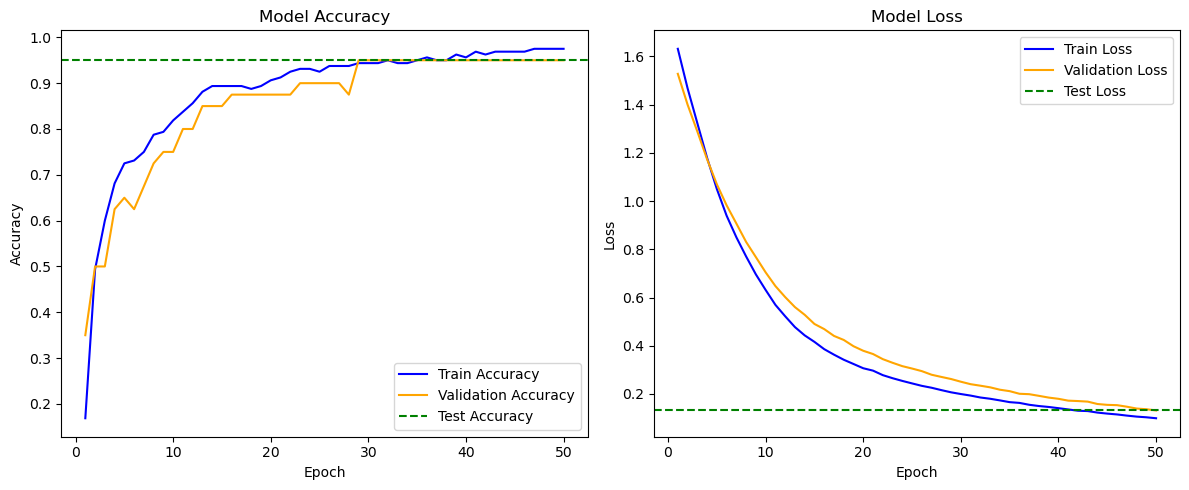

In [13]:
import matplotlib.pyplot as plt

# Evaluate on training and testing datasets
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Extract training history
epochs = range(1, len(history.history['accuracy']) + 1)
train_accuracy_history = history.history['accuracy']
val_accuracy_history = history.history['val_accuracy']
train_loss_history = history.history['loss']
val_loss_history = history.history['val_loss']

# Plot accuracy for training and testing
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy_history, label='Train Accuracy', color='blue')
plt.plot(epochs, val_accuracy_history, label='Validation Accuracy', color='orange')
plt.axhline(test_accuracy, linestyle='--', color='green', label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss for training and testing
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss_history, label='Train Loss', color='blue')
plt.plot(epochs, val_loss_history, label='Validation Loss', color='orange')
plt.axhline(test_loss, linestyle='--', color='green', label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Reverse Encoding the classes for understanding

In [14]:
# Get the mapping of drugs to their encoded values
drug_mapping = dict(zip(le_drug.classes_, le_drug.transform(le_drug.classes_)))

# Print the mapping
print("Drug encoding mapping:", drug_mapping)

# Example: Decode predictions or encoded labels
encoded_label = 0  # Example encoded label
decoded_label = le_drug.inverse_transform([encoded_label])
print(f"Encoded label {encoded_label} corresponds to drug {decoded_label[0]}")

Drug encoding mapping: {'DrugY': 0, 'drugA': 1, 'drugB': 2, 'drugC': 3, 'drugX': 4}
Encoded label 0 corresponds to drug DrugY
